-----
## Tom Croshaw
## Project 4 Notebook
### All code is run in Python 2

For web scraping please see project4_tom_webscraping.ipynb

-----

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator.

Once you have collected and cleaned the data, you will use it to answer the two questions outlined above.

### Part 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds such as the median salary.

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. Communication of your process is key.

Note that most listings *DO NOT* come with salary information. Being to able extrapolate or predict the expected salaries for other listings is exactly why this model will be so valuable.

**Steps for Part 1:**

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from at least 1000 postings for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (Title, location, department, etc.).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author a report to your Principal detailing your analysis.


### Part 2: Factors that distinguish job category

Using the job postings you scraped for part 1, or potentially new job postings from a second round of scraping, identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering you do, and what your target variables are.

The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


**BONUS PROBLEM:**

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

Note that this requires framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Requirements

- Scrape and prepare your data using BeautifulSoup.

- **Create and compare at least two models for each section.**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing: Ridge, logistic regression, KNN, SVM, etc.
- A Jupyter Notebook with your analysis for a peer audience of data scientists. Make sure to clearly describe and label each section.
- A written report directed to your (non-technical!) Principal

 **Pro Tip:** You can find a good example report [here](https://www.dlsweb.rmit.edu.au/lsu/content/2_assessmenttasks/assess_tuts/reports_ll/report.pdf).

 **Pro Tip 2:** Scraping is one of the most fun, useful and interesting skills out there!  Don’t lose out by copying someone else.

___

In [497]:
# Libraries

import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords # Import the stop word list
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

%matplotlib inline

### 1. Read in scraped data:

In [498]:
job_data = pd.read_csv("./job_posts.csv")

In [499]:
job_data.head()

,title,company,locality,region,location,industry,job_type,body1,salary,date_posted,rating
0,Data Scientist and Lead Data Scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,NaN,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm",NaN
1,Data Scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,NaN,Latitude Financial Services is a leading consu...,NaN,"Today, 3:06pm",NaN
2,Data Engineer / Data Scientist,Motion Recruitment -,Sydney,NaN,Location: Sydney,Information & Communication Technology,NaN,Australian start up success story requires a d...,Start up culture,"Today, 3:56pm",NaN
3,Risk Analyst / Data Scientist,Compliance & Risk Management Recruitment -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,NaN,Compliance and Risk Management Recruitment is ...,"$100,000 - $130,000","Today, 9:47am",NaN
4,Data Scientist,NRMA Motoring & Services -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,NaN,"The NRMA was born to keep people moving, and w...",NaN,"Today, 8:42am",NaN


In [500]:
job_data.drop_duplicates(['title','company','locality','region','industry','salary'])

,title,company,locality,region,location,industry,job_type,body1,salary,date_posted,rating
0,Data Scientist and Lead Data Scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,NaN,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm",NaN
1,Data Scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,NaN,Latitude Financial Services is a leading consu...,NaN,"Today, 3:06pm",NaN
2,Data Engineer / Data Scientist,Motion Recruitment -,Sydney,NaN,Location: Sydney,Information & Communication Technology,NaN,Australian start up success story requires a d...,Start up culture,"Today, 3:56pm",NaN
3,Risk Analyst / Data Scientist,Compliance & Risk Management Recruitment -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,NaN,Compliance and Risk Management Recruitment is ...,"$100,000 - $130,000","Today, 9:47am",NaN
4,Data Scientist,NRMA Motoring & Services -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,NaN,"The NRMA was born to keep people moving, and w...",NaN,"Today, 8:42am",NaN
5,DATA SCIENTIST - TOP 100 ASX COMPANY,Opus Recruitment Solutions -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Science & Technology,NaN,DATA SCIENTIST - TOP 100 ASX COMPANY\n\n6-mont...,$700 - 900 per day,8 May 2017,NaN
6,Data Scientist,Caltex Australia -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Science & Technology,NaN,"At Caltex, we’re with you all the way. We keep...",NaN,8 May 2017,NaN
7,Data Scientist - Big 4 Consulting,HCM Australia -,Melbourne,NaN,Location: Melbourne,Consulting & Strategy,NaN,Data Scientist - Big 4 Consulting\n\n\nConsult...,NaN,8 May 2017,NaN
8,"Devops, Full Stack, Data Scientists, Careers N...",Savvi -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Information & Communication Technology,NaN,"Devops, Full Stack, Data Scientists, Careers N...",NaN,7 May 2017,NaN
9,Data Scientist - Software Engineer,Xpand Group Pty Ltd -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Science & Technology,NaN,Data Scientist - Software Engineer\n\r\nMy cli...,NaN,5 May 2017,NaN


In [501]:
job_data.shape

(2904, 11)

In [502]:
# Print nulls in data

print (job_data.isnull().sum().sort_values(ascending=False))

rating         2904
job_type       2904
salary         1902
region          735
body1            55
date_posted       1
industry          1
location          1
locality          1
company           0
title             0
dtype: int64


In [503]:
# drop columns

job_data.drop('rating',axis =1, inplace = True)
job_data.drop('job_type', axis = 1, inplace = True)
job_data.head()

,title,company,locality,region,location,industry,body1,salary,date_posted
0,Data Scientist and Lead Data Scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm"
1,Data Scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,Latitude Financial Services is a leading consu...,NaN,"Today, 3:06pm"
2,Data Engineer / Data Scientist,Motion Recruitment -,Sydney,NaN,Location: Sydney,Information & Communication Technology,Australian start up success story requires a d...,Start up culture,"Today, 3:56pm"
3,Risk Analyst / Data Scientist,Compliance & Risk Management Recruitment -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,Compliance and Risk Management Recruitment is ...,"$100,000 - $130,000","Today, 9:47am"
4,Data Scientist,NRMA Motoring & Services -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,"The NRMA was born to keep people moving, and w...",NaN,"Today, 8:42am"


In [504]:
job_data.tail(20)

,title,company,locality,region,location,industry,body1,salary,date_posted
2884,Senior Marketing Analyst,Michael Page -,Perth,NaN,Location: Perth,Marketing & Communications,This is an incredible opportunity for an exper...,NaN,"Today, 11:17am"
2885,Senior Analytics Analyst,Lens10 -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,Lens10 is in search of a Senior Analytics Anal...,NaN,"Today, 4:02pm"
2886,Performance Analyst | Global Institute,Hays Banking -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,Performance Analyst | Permanent Opportunity\n\...,"Up to $95,000 + Super","Today, 11:31am"
2887,"Analyst - 6-9 Month Secondment, Townsville, QLD",Commonwealth Bank - Business & Private B anking -,Townsville & Northern QLD,NaN,Location: Townsville & Northern QLD,Banking & Financial Services,"Analyst, 6 Month Secondment/Contract\n\nTownsv...",NaN,"Today, 11:27am"
2888,Senior Business Analyst,Velrada -,Adelaide,NaN,Location: Adelaide,Consulting & Strategy,Velrada is an award winning specialist Managem...,Competitive,"Today, 1:01pm"
2889,SAP FICO Business Analyst,Hays Information Technology -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,SAP Business Analyst - focused on supporting S...,NaN,"Today, 12:54pm"
2890,Security Analyst,Cognizant Technology Solutions Australia Pty L...,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,About Cognizant\nCognizant (NASDAQ: CTSH) is a...,NaN,"Today, 11:02am"
2891,Business Process Analyst,University of New South Wales -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Education & Training,One of Australia's leading research & teaching...,"Base: $81,199 - $86,620 p.a","Today, 3:50pm"
2892,Insights Analyst,Transport Certification Australia Ltd -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Information & Communication Technology,Transport Certification Australia (TCA) seeks ...,NaN,"Today, 1:58pm"
2893,Principal Program Analyst (Risk & Assurance),"Department of Science, Information Technology ...",Brisbane,CBD & Inner Suburbs,Location: Brisbane CBD & Inner Suburbs,Government & Defence,"Department of Science, IT and Innovation / Bri...",NaN,"Today, 4:26pm"


### Job Type

In [505]:
job_data['title'].value_counts()

Business Analyst                                                                 297
Senior Business Analyst                                                           99
Data Analyst                                                                      65
Data Scientist                                                                    48
Technical Business Analyst                                                        30
Business Systems Analyst                                                          24
Digital Business Analyst                                                          14
Business Analysts                                                                 14
Business Process Analyst                                                          13
Agile Business Analyst                                                            12
Salesforce Business Analyst                                                       11
Senior Data Analyst                                              

### Location

In [506]:
job_data['locality'].value_counts()

Sydney                                  1427
Melbourne                                660
Brisbane                                 285
ACT                                      216
Perth                                    128
Adelaide                                  64
Newcastle, Maitland & Hunter              16
Gosford & Central Coast                   16
Gold Coast                                14
Geelong & Great Ocean Road                11
Cairns & Far North                         9
Hobart                                     6
Port Macquarie & Mid North Coast           5
Wollongong, Illawarra & South Coast        4
Townsville & Northern QLD                  4
Sunshine Coast                             3
Bendigo, Goldfields & Macedon Ranges       3
Toowoomba & Darling Downs                  3
Blue Mountains & Central West              3
Mackay & Coalfields                        2
Dubbo & Central NSW                        2
Devonport & North West                     2
Mildura & 

In [507]:
location_dict = {'Sydney':"1_syd",'Melbourne':"1_mel", 'Brisbane':"1_bri",'Perth':"1_per",'Adelaide':"1_ade"
                ,'Newcastle, Maitland & Hunter':"1_new"
                ,'Gosford & Central Coast':"1_gos",'Gold Coast':"1_gc",'Geelong & Great Ocean Road':"1_gee"
                ,'Cairns & Far North':"1_cai",'Hobart':"1_hob"
                ,'Port Macquarie & Mid North Coast':"1_ptm",'Wollongong, Illawarra & South Coast':"1_wol"}

job_data['loc_val'] = job_data['locality'].map(location_dict)

# fill with 0 as a regional indicator
job_data['loc_val'] = job_data['loc_val'].fillna("1_other")

print job_data.head()

                                    title  \
0  Data Scientist and Lead Data Scientist   
1                          Data Scientist   
2          Data Engineer / Data Scientist   
3           Risk Analyst / Data Scientist   
4                          Data Scientist   

                                      company   locality  \
0                     Clicks IT Recruitment -     Sydney   
1               Latitude Financial Services -  Melbourne   
2                        Motion Recruitment -     Sydney   
3  Compliance & Risk Management Recruitment -  Melbourne   
4                  NRMA Motoring & Services -     Sydney   

                               region  \
0   CBD, Inner West & Eastern Suburbs   
1                 CBD & Inner Suburbs   
2                                 NaN   
3                 CBD & Inner Suburbs   
4   CBD, Inner West & Eastern Suburbs   

                                            location  \
0  Location: Sydney CBD, Inner West & Eastern Sub...   
1        

In [508]:
# Create dummies for locations

loc_val_dummies = pd.get_dummies(job_data['loc_val'])

# Join the dummy variables to the main dataframe:

job_data = pd.concat([job_data, loc_val_dummies], axis=1)

# Drop MiscFeature column and one of the MiscFeature categories ('other'):

job_data = job_data.drop('1_other', 1)
job_data.head()

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,1_gc,1_gee,1_gos,1_hob,1_mel,1_new,1_per,1_ptm,1_syd,1_wol
0,Data Scientist and Lead Data Scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm",1_syd,...,0,0,0,0,0,0,0,0,1,0
1,Data Scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,Latitude Financial Services is a leading consu...,NaN,"Today, 3:06pm",1_mel,...,0,0,0,0,1,0,0,0,0,0
2,Data Engineer / Data Scientist,Motion Recruitment -,Sydney,NaN,Location: Sydney,Information & Communication Technology,Australian start up success story requires a d...,Start up culture,"Today, 3:56pm",1_syd,...,0,0,0,0,0,0,0,0,1,0
3,Risk Analyst / Data Scientist,Compliance & Risk Management Recruitment -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,Compliance and Risk Management Recruitment is ...,"$100,000 - $130,000","Today, 9:47am",1_mel,...,0,0,0,0,1,0,0,0,0,0
4,Data Scientist,NRMA Motoring & Services -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,"The NRMA was born to keep people moving, and w...",NaN,"Today, 8:42am",1_syd,...,0,0,0,0,0,0,0,0,1,0


### Industry

In [509]:
job_data['industry'].value_counts()

Information & Communication Technology    2046
Accounting                                 210
Banking & Financial Services               157
Consulting & Strategy                       99
Science & Technology                        81
Marketing & Communications                  73
Government & Defence                        65
Insurance & Superannuation                  21
Education & Training                        20
Sales                                       19
Healthcare & Medical                        18
Manufacturing, Transport & Logistics        17
Administration & Office Support             17
Human Resources & Recruitment               13
Engineering                                  9
Mining, Resources & Energy                   8
Real Estate & Property                       6
Call Centre & Customer Service               5
Retail & Consumer Products                   5
Advertising, Arts & Media                    3
Design & Architecture                        3
Community Ser

In [510]:
industry_dict = {'Information & Communication Technology':'2_ICT'
                 ,'Accounting':'2_accounting'
                 ,'Banking & Financial Services':'2_BFS'
                 ,'Consulting & Strategy':'2_ConsStrat'
                 ,'Science & Technology':'2_SciTech'
                 ,'Marketing & Communications':'2_MarkComms'
                 ,'Government & Defence':'2_Gov'
                 ,'Insurance & Superannuation':'2_InsurSuper'
                 ,'Education & Training':'2_Education'
                 ,'Sales':'2_Sales'
                 ,'Healthcare & Medical':'2_health'
                 ,'Manufacturing, Transport & Logistics':'2_manufacturing'
                 ,'Administration & Office Support':'2_admin'
                 ,'Human Resources & Recruitment':'2_HR'
                 ,'Engineering':'2_engineering','Mining, Resources & Energy':'2_miningEnergy'
                 ,'Real Estate & Property':'2_property'
                 ,'Call Centre & Customer Service':'2_customerS'
                 ,'Retail & Consumer Products':'2_retail'
                 ,'Advertising, Arts & Media':'2_media'
                 ,'Design & Architecture':'2_architecture'
                 ,'Community Services & Development':'2_csd'
                 ,'Legal':'2_legal'
                 ,'Farming, Animals & Conservation':'2_farming'
                 ,'Construction':'2_construct'
                 ,'CEO & General Management':'2_management'}

job_data['industry_val'] = job_data['industry'].map(industry_dict)
job_data['industry_val'] =job_data['industry_val'].fillna('2_other')
job_data.head(1)

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,1_gee,1_gos,1_hob,1_mel,1_new,1_per,1_ptm,1_syd,1_wol,industry_val
0,Data Scientist and Lead Data Scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm",1_syd,...,0,0,0,0,0,0,0,1,0,2_ICT


In [511]:
# Create dummies for locations

industry_val_dummies = pd.get_dummies(job_data['industry_val'])

# Join the dummy variables to the main dataframe:

job_data = pd.concat([job_data, industry_val_dummies], axis=1)

# Drop MiscFeature column and one of the MiscFeature categories ('other'):

job_data = job_data.drop('2_other', 1)
job_data.head(1)

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,2_engineering,2_farming,2_health,2_legal,2_management,2_manufacturing,2_media,2_miningEnergy,2_property,2_retail
0,Data Scientist and Lead Data Scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm",1_syd,...,0,0,0,0,0,0,0,0,0,0


### Job Type

In [512]:
job_data['title'].value_counts(20)

Business Analyst                                                                 0.102273
Senior Business Analyst                                                          0.034091
Data Analyst                                                                     0.022383
Data Scientist                                                                   0.016529
Technical Business Analyst                                                       0.010331
Business Systems Analyst                                                         0.008264
Digital Business Analyst                                                         0.004821
Business Analysts                                                                0.004821
Business Process Analyst                                                         0.004477
Agile Business Analyst                                                           0.004132
Salesforce Business Analyst                                                      0.003788
Senior Dat

In [513]:
job_data["title_val"] = '3_other'
job_data["title"] = job_data['title'].str.lower()
job_data["title"] = job_data["title"].fillna('NA')
job_data.ix[job_data["title"].str.contains('data scientist', na=False),"title_val"] = '3_ds'
job_data.ix[job_data["title"].str.contains('data analyst', na=False),"title_val"] = '3_da'
job_data.ix[job_data["title"].str.contains('research analyst', na=False),"title_val"] = '3_ra'
job_data.ix[job_data["title"].str.contains('business analyst', na=False),"title_val"] = '3_ba'
job_data.ix[job_data["title"].str.contains('business intelligence', na=False),"title_val"] = '3_bi'
job_data[['title','title_val']].head(4)

,title,title_val
0,data scientist and lead data scientist,3_ds
1,data scientist,3_ds
2,data engineer / data scientist,3_ds
3,risk analyst / data scientist,3_ds


In [514]:
# Create dummies for locations

title_val_dummies = pd.get_dummies(job_data['title_val'])

# Join the dummy variables to the main dataframe:

job_data = pd.concat([job_data, title_val_dummies], axis=1)

# Drop MiscFeature column and one of the MiscFeature categories ('other'):

job_data = job_data.drop('3_other', 1)
job_data.head(1)

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,2_media,2_miningEnergy,2_property,2_retail,title_val,3_ba,3_bi,3_da,3_ds,3_ra
0,data scientist and lead data scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm",1_syd,...,0,0,0,0,3_ds,0,0,0,1,0


In [515]:
job_data["seniority_val"] = '4_other'
job_data["title"] = job_data['title'].str.lower()
job_data.ix[job_data["title"].str.contains('junior'),"seniority_val"] = '4_junior'
job_data.ix[job_data["title"].str.contains('senior'),"seniority_val"] = '4_senior'
job_data.ix[job_data["title"].str.contains('manager'),"seniority_val"] = '4_manager'
job_data.ix[job_data["title"].str.contains('specialist'),"seniority_val"] = '4_spec'

In [516]:
# Create dummies for locations

senior_val_dummies = pd.get_dummies(job_data['seniority_val'])

# Join the dummy variables to the main dataframe:

job_data = pd.concat([job_data, senior_val_dummies], axis=1)

# Drop MiscFeature column and one of the MiscFeature categories ('other'):

job_data = job_data.drop('4_other', 1)
job_data.head(1)

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,3_ba,3_bi,3_da,3_ds,3_ra,seniority_val,4_junior,4_manager,4_senior,4_spec
0,data scientist and lead data scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NaN,"Today, 5:43pm",1_syd,...,0,0,0,1,0,4_other,0,0,0,0


### Salary

In [517]:
# some targeted cleaning of salary information to make parsing easier:
job_data["salary"] = job_data["salary"].str.replace("p.a", "year")
job_data["salary"] = job_data["salary"].str.replace("p.d", "day")
job_data["salary"] = job_data["salary"].str.replace("p.h", "hour")
job_data["salary"] = job_data["salary"].str.replace("p.m", "month")
job_data["salary"] = job_data["salary"].str.replace("\n", "")
job_data["salary"] = job_data["salary"].str.replace(",", "")
job_data["salary"] = job_data["salary"].str.replace("$", "")
job_data["salary"] = job_data["salary"].str.replace("/", "")
job_data["salary"] = job_data["salary"].str.replace("+", "")
job_data["salary"] = job_data["salary"].str.replace("k", "000")
job_data["salary"] = job_data["salary"].str.replace("K", "000")
job_data["salary"] = job_data["salary"].str.replace("to", "-")
job_data["salary"]

0                                               NaN
1                                               NaN
2                                  Start up culture
3                                   100000 - 130000
4                                               NaN
5                                 700 - 900 per day
6                                               NaN
7                                               NaN
8                                               NaN
9                                               NaN
10                                150-160000  Super
11                                              NaN
12                                              NaN
13                                  120000 - 130000
14                               900 - 1200 per day
15                     100000 - 140000 year.  Super
16                     150000 - 180000 year.  Super
17                                              NaN
18      Enjoy wor000ing  in a flexible environment!
19      Enjo

In [518]:
job_data["salary_period"] = np.nan
#if the salary contains information on time period, save that time
#period string in the salary_period column
job_data["salary"] = job_data["salary"].fillna('NA')
job_data.ix[job_data["salary"].str.contains("year"),"salary_period"] = "year"
job_data.ix[job_data["salary"].str.contains("month"),"salary_period"] = "month"
job_data.ix[job_data["salary"].str.contains("week"),"salary_period"] = "week"
job_data.ix[job_data["salary"].str.contains("day"),"salary_period"] = "day"
job_data.ix[job_data["salary"].str.contains("hour"),"salary_period"] = "hour"
job_data

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,3_bi,3_da,3_ds,3_ra,seniority_val,4_junior,4_manager,4_senior,4_spec,salary_period
0,data scientist and lead data scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NA,"Today, 5:43pm",1_syd,...,0,0,1,0,4_other,0,0,0,0,NaN
1,data scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,Latitude Financial Services is a leading consu...,NA,"Today, 3:06pm",1_mel,...,0,0,1,0,4_other,0,0,0,0,NaN
2,data engineer / data scientist,Motion Recruitment -,Sydney,NaN,Location: Sydney,Information & Communication Technology,Australian start up success story requires a d...,Start up culture,"Today, 3:56pm",1_syd,...,0,0,1,0,4_other,0,0,0,0,NaN
3,risk analyst / data scientist,Compliance & Risk Management Recruitment -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,Compliance and Risk Management Recruitment is ...,100000 - 130000,"Today, 9:47am",1_mel,...,0,0,1,0,4_other,0,0,0,0,NaN
4,data scientist,NRMA Motoring & Services -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,"The NRMA was born to keep people moving, and w...",NA,"Today, 8:42am",1_syd,...,0,0,1,0,4_other,0,0,0,0,NaN
5,data scientist - top 100 asx company,Opus Recruitment Solutions -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Science & Technology,DATA SCIENTIST - TOP 100 ASX COMPANY\n\n6-mont...,700 - 900 per day,8 May 2017,1_syd,...,0,0,1,0,4_other,0,0,0,0,day
6,data scientist,Caltex Australia -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Science & Technology,"At Caltex, we’re with you all the way. We keep...",NA,8 May 2017,1_syd,...,0,0,1,0,4_other,0,0,0,0,NaN
7,data scientist - big 4 consulting,HCM Australia -,Melbourne,NaN,Location: Melbourne,Consulting & Strategy,Data Scientist - Big 4 Consulting\n\n\nConsult...,NA,8 May 2017,1_mel,...,0,0,1,0,4_other,0,0,0,0,NaN
8,"devops, full stack, data scientists, careers n...",Savvi -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Information & Communication Technology,"Devops, Full Stack, Data Scientists, Careers N...",NA,7 May 2017,1_mel,...,0,0,1,0,4_other,0,0,0,0,NaN
9,data scientist - software engineer,Xpand Group Pty Ltd -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Science & Technology,Data Scientist - Software Engineer\n\r\nMy cli...,NA,5 May 2017,1_mel,...,0,0,1,0,4_other,0,0,0,0,NaN


In [519]:
job_data["salary_range"] = [re.findall('\d+', s) for s in job_data["salary"]]
job_data["salary_range"]

0                     []
1                     []
2                     []
3       [100000, 130000]
4                     []
5             [700, 900]
6                     []
7                     []
8                     []
9                     []
10         [150, 160000]
11                    []
12                    []
13      [120000, 130000]
14           [900, 1200]
15      [100000, 140000]
16      [150000, 180000]
17                    []
18                 [000]
19                 [000]
20                    []
21                    []
22                    []
23      [100000, 130000]
24                    []
25            [700, 900]
26                    []
27                    []
28                    []
29                    []
              ...       
2874                  []
2875                  []
2876                  []
2877      [60000, 70000]
2878                  []
2879                  []
2880      [70000, 85000]
2881                  []
2882                  []


In [520]:
salary_max = []
for salary in job_data["salary_range"]:
    if len(salary) > 0:
        salary_max.append(float(max(salary)))
    else:
        salary_max.append(1)
        
print len(salary_max)

2904


In [521]:
salary_max_df = pd.Series(salary_max,name='salary_max')

print salary_max_df.head()

job_data = job_data.join(salary_max_df)
job_data.head()

0         1.0
1         1.0
2         1.0
3    130000.0
4         1.0
Name: salary_max, dtype: float64


,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,3_ds,3_ra,seniority_val,4_junior,4_manager,4_senior,4_spec,salary_period,salary_range,salary_max
0,data scientist and lead data scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NA,"Today, 5:43pm",1_syd,...,1,0,4_other,0,0,0,0,NaN,[],1.0
1,data scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,Latitude Financial Services is a leading consu...,NA,"Today, 3:06pm",1_mel,...,1,0,4_other,0,0,0,0,NaN,[],1.0
2,data engineer / data scientist,Motion Recruitment -,Sydney,NaN,Location: Sydney,Information & Communication Technology,Australian start up success story requires a d...,Start up culture,"Today, 3:56pm",1_syd,...,1,0,4_other,0,0,0,0,NaN,[],1.0
3,risk analyst / data scientist,Compliance & Risk Management Recruitment -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,Compliance and Risk Management Recruitment is ...,100000 - 130000,"Today, 9:47am",1_mel,...,1,0,4_other,0,0,0,0,NaN,"[100000, 130000]",130000.0
4,data scientist,NRMA Motoring & Services -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,"The NRMA was born to keep people moving, and w...",NA,"Today, 8:42am",1_syd,...,1,0,4_other,0,0,0,0,NaN,[],1.0


In [522]:
# Annualise wages
job_data["salary_multiplier"] = 1
job_data["salary_period"] = job_data["salary_period"].fillna('NA')
job_data.ix[job_data["salary_period"].str.contains("year"),"salary_multiplier"] = 1.0
job_data.ix[job_data["salary_period"].str.contains("month"),"salary_multiplier"] = 12.0
job_data.ix[job_data["salary_period"].str.contains("week"),"salary_multiplier"] = 48.0
job_data.ix[job_data["salary_period"].str.contains("day"),"salary_multiplier"] = 249.0
job_data.ix[job_data["salary_period"].str.contains("hour"),"salary_multiplier"] = 1992.0

In [523]:
job_data.dtypes

title                 object
company               object
locality              object
region                object
location              object
industry              object
body1                 object
salary                object
date_posted           object
loc_val               object
1_ade                  uint8
1_bri                  uint8
1_cai                  uint8
1_gc                   uint8
1_gee                  uint8
1_gos                  uint8
1_hob                  uint8
1_mel                  uint8
1_new                  uint8
1_per                  uint8
1_ptm                  uint8
1_syd                  uint8
1_wol                  uint8
industry_val          object
2_BFS                  uint8
2_ConsStrat            uint8
2_Education            uint8
2_Gov                  uint8
2_HR                   uint8
2_ICT                  uint8
                      ...   
2_admin                uint8
2_architecture         uint8
2_construct            uint8
2_csd         

In [524]:
# Calculate final wage
job_data['salary_max'] = job_data["salary_max"].fillna('1')
job_data['salary_final'] = job_data['salary_max'] * job_data['salary_multiplier']
job_data.salary_final.replace(1.0,0.0)
job_data.head()

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,seniority_val,4_junior,4_manager,4_senior,4_spec,salary_period,salary_range,salary_max,salary_multiplier,salary_final
0,data scientist and lead data scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NA,"Today, 5:43pm",1_syd,...,4_other,0,0,0,0,NA,[],1.0,1.0,1.0
1,data scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,Latitude Financial Services is a leading consu...,NA,"Today, 3:06pm",1_mel,...,4_other,0,0,0,0,NA,[],1.0,1.0,1.0
2,data engineer / data scientist,Motion Recruitment -,Sydney,NaN,Location: Sydney,Information & Communication Technology,Australian start up success story requires a d...,Start up culture,"Today, 3:56pm",1_syd,...,4_other,0,0,0,0,NA,[],1.0,1.0,1.0
3,risk analyst / data scientist,Compliance & Risk Management Recruitment -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Banking & Financial Services,Compliance and Risk Management Recruitment is ...,100000 - 130000,"Today, 9:47am",1_mel,...,4_other,0,0,0,0,NA,"[100000, 130000]",130000.0,1.0,130000.0
4,data scientist,NRMA Motoring & Services -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Marketing & Communications,"The NRMA was born to keep people moving, and w...",NA,"Today, 8:42am",1_syd,...,4_other,0,0,0,0,NA,[],1.0,1.0,1.0


### Cleaning Body Text

In [525]:
# Function taken from my Capstone Part-02 and

def clean_text(body):

    #Remove links from body
    link_remove = re.sub(r"http\S+", "", str(body))
    
    #Remove non-letters from body    
    letters = re.sub("[^a-zA-Z]", " ", link_remove) 
    
    #Convert to lower case, split into individual words
    words = letters.lower().split()                             
    
    #Tip from, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    #Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    #Join the words back into one string separated by space and return the result.
    return (" ".join(meaningful_words))

In [526]:
clean_body_text = []

for row in job_data['body1']:
    clean_body_text.append(clean_text(row))

clean_body_text[0]

'multiple roles x data scientist x lead data scientist sydney cbd salary negotiable currently recruiting data scientist work client sydney cbd position responsible implementing analytical solutions process include analytical business transformation focusing customer product logistics warehousing inventory responsibilities utilise statistical tools create descriptive analytics creating business caseable design develop deliver predictive analytical models ideally retail industry must experience customer segmentation forecasting demand supply experience industry happy speak manage various processes assigned projectsperform data quality control assurance handle quality issuesable apply visual analysis techniques using different toolsets etl qualifications bachelors degree business technology industry equivalentprevious experience etl sdlcable identify approach appropriate process includes data collection sampling data processing manipulation experience delivering unit testsexperience using

In [527]:
job_data['body_clean'] = clean_body_text
job_data.head(2)

,title,company,locality,region,location,industry,body1,salary,date_posted,loc_val,...,4_junior,4_manager,4_senior,4_spec,salary_period,salary_range,salary_max,salary_multiplier,salary_final,body_clean
0,data scientist and lead data scientist,Clicks IT Recruitment -,Sydney,"CBD, Inner West & Eastern Suburbs","Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,Multiple roles | 1X Data Scientist | 1 X Lead ...,NA,"Today, 5:43pm",1_syd,...,0,0,0,0,NA,[],1.0,1.0,1.0,multiple roles x data scientist x lead data sc...
1,data scientist,Latitude Financial Services -,Melbourne,CBD & Inner Suburbs,Location: Melbourne CBD & Inner Suburbs,Consulting & Strategy,Latitude Financial Services is a leading consu...,NA,"Today, 3:06pm",1_mel,...,0,0,0,0,NA,[],1.0,1.0,1.0,latitude financial services leading consumer f...


In [528]:
print ("Creating words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None,stop_words = None,max_features = 10000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_body_text)

# Fit cvec and converting the result to a DataFrame.
words_df = pd.DataFrame(vectorizer.transform(clean_body_text).todense(), columns=vectorizer.get_feature_names())

print (words_df.shape)

words_df.fillna(0)
words_df.sum().nlargest(100)
words_df.head()

Creating words...

(2904, 10000)


,aarconsultinggroup,ab,abadilla,abap,abapdata,abappscd,abas,abby,abigail,abilities,...,yow,yrs,zealand,zend,zenexus,zero,zinfra,zone,zones,zookeeper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [529]:
skills = ['r','r.','c++', 'python', 'java', 'ruby', 'javascript', 'data',
        'matlab', 'scala', 'excel', 'tableau', 'd3.js', 'sas','html','d3',
        'hadoop', 'mapreduce','spark', 'pig', 'hive', 'shark','stats',
        'zookeeper', 'flume', 'sql', 'nosql',
        'mongodb', 'aws', 'unstructured', 'structured',
        'structured', 'curiosity','communication','munging',
        'learning', 'calculus', 'algebra', 'statistics', 'visualization',
        'engineering', 'maths', 'design',
        'development', 'administration', 'management','research',
        'data mining', 'modeling', 'predictive',
        'b.i.', 'business intelligence', 'optimization', 'mining','science'
        'cloud', 'viz ', 'statistics',
        'analysis', 'n.l.p', 'nlp',
        'simulation', 'simulations', 'classification', 'clustering','regression',
        'entrepreneurial', 'entrepreneur', 'team','systems','IT',
        'wrangling', 'storyteller', 'storytelling', 'hacking',
        'deep', 'network', 'neural', 'sci-kit',
        'pandas', 'numpy', 'bi', 'knime', 'octave', 'rapidminer', 'xlstat', '@risk',
        'probability', 'dato', 'ggplot', 'ggvis', 'word', 'powerpoint', 'studio','management','analyst',
        'presentation','writing']

word_list = list(words_df.columns.values)

filter_list = [x for x in word_list if x in skills]
for item in filter_list:
    print item

administration
analysis
analyst
aws
bi
classification
clustering
communication
curiosity
data
deep
design
development
engineering
entrepreneur
entrepreneurial
excel
flume
hacking
hadoop
hive
html
java
javascript
learning
management
mapreduce
maths
matlab
mining
modeling
mongodb
network
neural
nlp
nosql
numpy
optimization
pandas
pig
powerpoint
predictive
presentation
python
rapidminer
regression
research
ruby
sas
scala
simulation
simulations
spark
sql
statistics
stats
structured
studio
systems
tableau
team
unstructured
visualization
word
wrangling
writing
zookeeper


In [530]:
skills_df = words_df[['python', 'java', 'ruby', 'javascript', 'data',
        'matlab', 'scala', 'excel', 'tableau', 'sas','html',
        'hadoop', 'mapreduce','spark', 'pig', 'hive', 'stats',
        'zookeeper', 'flume', 'sql', 'nosql',
        'mongodb', 'aws', 'unstructured', 'structured',
        'structured', 'curiosity','communication',
        'learning', 'statistics', 'visualization',
        'engineering', 'maths', 'design',
        'development', 'administration', 'management','research',
        'modeling', 'predictive',
        'intelligence', 'optimization', 'mining','science',
        'cloud', 'statistics',
        'analysis', 'nlp',
        'simulation', 'simulations', 'classification', 'clustering','regression',
        'entrepreneurial', 'entrepreneur', 'team','systems',
        'wrangling','hacking',
        'deep', 'network', 'neural',
        'pandas', 'numpy', 'bi', 'rapidminer',
        'word', 'powerpoint', 'studio','management','analyst', 'ms',
        'presentation','writing',
        'bachelors','bachelor','masters','phd']]

print (skills_df.shape)
skills_df.head()

(2904, 78)


,python,java,ruby,javascript,data,matlab,scala,excel,tableau,sas,...,studio,management,analyst,ms,presentation,writing,bachelors,bachelor,masters,phd
0,0,0,0,0,6,0,0,0,1,2,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,0,8,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,0
2,1,0,0,0,9,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,3,1,0,0,0,0,0,0,0
4,0,0,0,0,10,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [531]:
job_data_final = pd.concat([job_data, skills_df], axis=1)
job_data_final.shape

(2904, 145)

In [532]:
job_data_final.isnull().sum().sort_values(ascending=False)

region             735
body1               55
locality             1
location             1
industry             1
date_posted          1
phd                  0
2_media              0
3_bi                 0
3_ba                 0
title_val            0
2_retail             0
2_property           0
2_miningEnergy       0
2_legal              0
2_manufacturing      0
2_management         0
3_ds                 0
2_health             0
2_farming            0
2_engineering        0
3_da                 0
4_manager            0
3_ra                 0
seniority_val        0
4_junior             0
2_csd                0
4_senior             0
4_spec               0
salary_period        0
                  ... 
zookeeper            0
stats                0
hive                 0
spark                0
aws                  0
mapreduce            0
hadoop               0
html                 0
sas                  0
tableau              0
excel                0
mongodb              0
unstructure

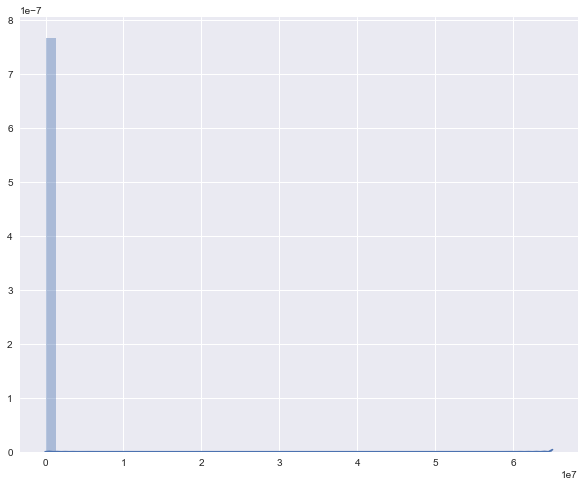

In [533]:
job_data_final = job_data_final[job_data_final['salary_final'] > 1]

salary_values = job_data_final['salary_final'].values

fig = plt.figure(figsize=(10, 8))
sns.distplot(salary_values)
plt.show()

727
250000.0


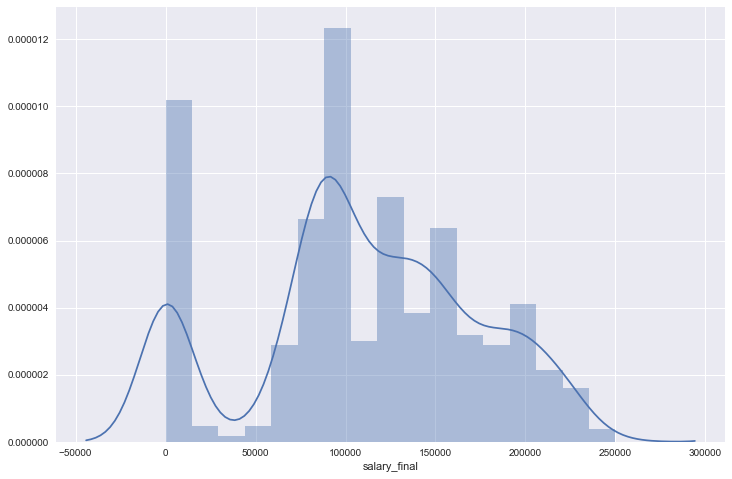

In [534]:
# Remove high outlier

# Calculate mean and std
mean = np.mean(job_data_final['salary_final'], axis=0)
sd = np.std(job_data_final['salary_final'], axis=0)

# Create list of friends count values to keep:
final_list = [x for x in job_data_final.salary_final if (x < mean + 1.5 * sd)]

# Filter hail data by friends counts to keep:
job_data_final = job_data_final.ix[(job_data_final['salary_final'].isin(final_list))]

# Check length of new dataframe and new max friends count
print (len(job_data_final))
print (job_data_final['salary_final'].max())

# > 1000 outliers removed

fig = plt.figure(figsize=(12, 8))
sns.distplot(job_data_final['salary_final'])

(619, 145)


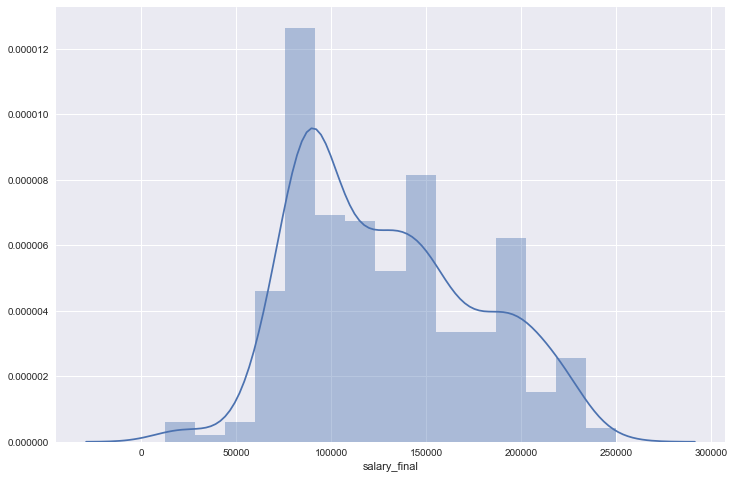

In [535]:
job_data_final = job_data_final[job_data_final['salary_final'] > 10000]

print job_data_final.shape

fig = plt.figure(figsize=(12, 8))
sns.distplot(job_data_final['salary_final'])

In [536]:
job_data_final.dtypes

title              object
company            object
locality           object
region             object
location           object
industry           object
body1              object
salary             object
date_posted        object
loc_val            object
1_ade               uint8
1_bri               uint8
1_cai               uint8
1_gc                uint8
1_gee               uint8
1_gos               uint8
1_hob               uint8
1_mel               uint8
1_new               uint8
1_per               uint8
1_ptm               uint8
1_syd               uint8
1_wol               uint8
industry_val       object
2_BFS               uint8
2_ConsStrat         uint8
2_Education         uint8
2_Gov               uint8
2_HR                uint8
2_ICT               uint8
                    ...  
simulation          int64
simulations         int64
classification      int64
clustering          int64
regression          int64
entrepreneurial     int64
entrepreneur        int64
team        

### Modelling

I will perform 2 modelling exericses:
1. for main job info: location, industry, jobtype, seniority
2. for key skills


Firstly I will create the classifier target: High versus low salary to answer the question:
- Which features have the greatest importance when determining a low vs. high paying job?

I will assume a high paying job is anything over **$100,000.**

In [537]:
# Create a new X value for high vs low:
job_data_final['salary_lvh'] = 0

# Set >100000 as "high-paying" job
job_data_final.loc[job_data_final.salary_final > 100000, 'salary_lvh'] = 1

job_data_final['salary_lvh'].value_counts()

1    380
0    239
Name: salary_lvh, dtype: int64

In [538]:
job_data_final.columns.values

array(['title', 'company', 'locality', 'region', 'location', 'industry',
       'body1', 'salary', 'date_posted', 'loc_val', '1_ade', '1_bri',
       '1_cai', '1_gc', '1_gee', '1_gos', '1_hob', '1_mel', '1_new',
       '1_per', '1_ptm', '1_syd', '1_wol', 'industry_val', '2_BFS',
       '2_ConsStrat', '2_Education', '2_Gov', '2_HR', '2_ICT',
       '2_InsurSuper', '2_MarkComms', '2_Sales', '2_SciTech',
       '2_accounting', '2_admin', '2_architecture', '2_construct', '2_csd',
       '2_customerS', '2_engineering', '2_farming', '2_health', '2_legal',
       '2_management', '2_manufacturing', '2_media', '2_miningEnergy',
       '2_property', '2_retail', 'title_val', '3_ba', '3_bi', '3_da',
       '3_ds', '3_ra', 'seniority_val', '4_junior', '4_manager',
       '4_senior', '4_spec', 'salary_period', 'salary_range', 'salary_max',
       'salary_multiplier', 'salary_final', 'body_clean', u'python',
       u'java', u'ruby', u'javascript', u'data', u'matlab', u'scala',
       u'excel', u'tabl

In [539]:
# Dataframe of all overall (dummy) variables - location, industry, role, seniortiy

X_overall = job_data_final[['1_ade', '1_bri',
       '1_cai', '1_gc', '1_gee', '1_gos', '1_hob', '1_mel', '1_new',
       '1_per', '1_ptm', '1_syd', '1_wol', '2_BFS',
       '2_ConsStrat', '2_Education', '2_Gov', '2_HR', '2_ICT',
       '2_InsurSuper', '2_MarkComms', '2_Sales', '2_SciTech',
       '2_accounting', '2_admin', '2_architecture', '2_construct', '2_csd',
       '2_customerS', '2_engineering', '2_farming', '2_health', '2_legal',
       '2_management', '2_manufacturing', '2_media', '2_miningEnergy',
       '2_property', '2_retail', '3_ba', '3_bi', '3_da',
       '3_ds', '3_ra', '4_junior', '4_manager',
       '4_senior', '4_spec']]

y = job_data_final['salary_lvh']

In [540]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [541]:
# Standardise the X variables
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xs_overall = ss.fit_transform(X_overall)

## Decision Tree

In [542]:
dtc_params = {
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()
dtc_gs = GridSearchCV(dtc, dtc_params, cv=5, verbose=1, refit=True)

dtc_gs.fit(Xs_overall, y)

Fitting 5 folds for each of 847 candidates, totalling 4235 fits


[Parallel(n_jobs=1)]: Done 4235 out of 4235 | elapsed:   16.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [543]:
dtc_best = dtc_gs.best_estimator_
print dtc_gs.best_params_
print dtc_gs.best_score_

{'max_features': 'sqrt', 'min_samples_split': 5, 'max_depth': 9}
0.70436187399


In [544]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeClassifier(max_features='sqrt',min_samples_split=4,max_depth=7)

dtr.fit(X_overall, y)

dtr_scores = cross_val_score(dtr, X_overall, y, cv=5)
print dtr_scores
print (sum(dtr_scores)/len(dtr_scores))

[ 0.62096774  0.66129032  0.69354839  0.63709677  0.61788618]
0.646157880934


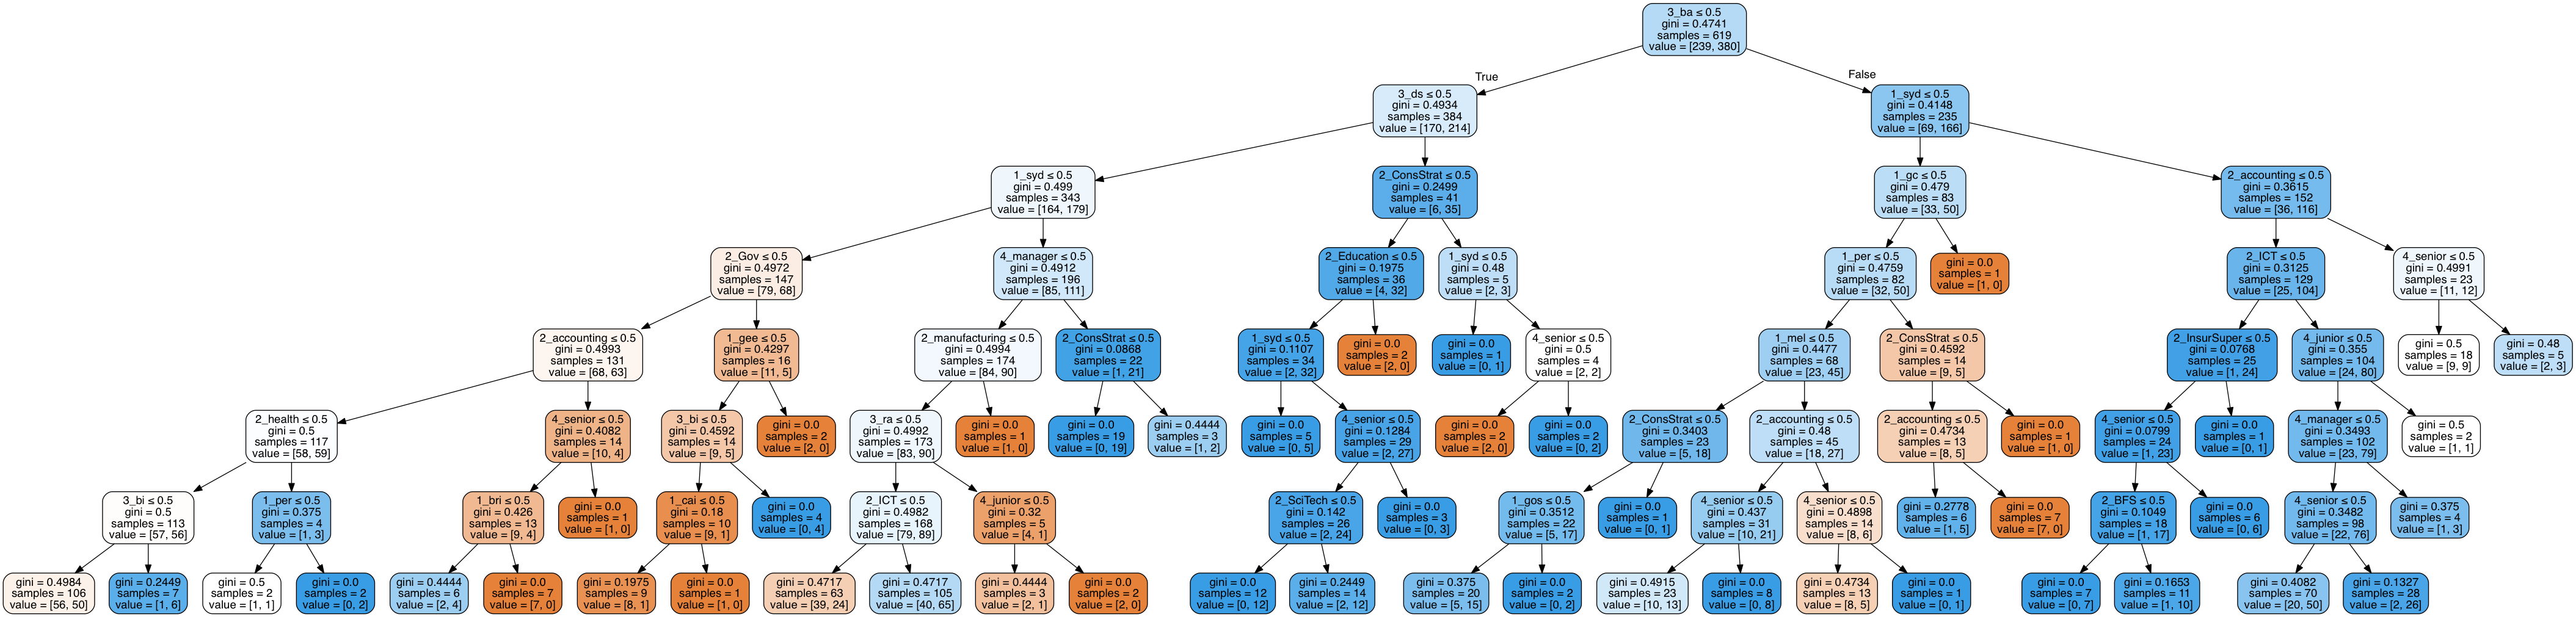

In [545]:
# Plot the final decision tree!

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_overall.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [546]:
# Extract the top features

top_features = pd.DataFrame({
        'feature':X_overall.columns,
        'importance':dtc_best.feature_importances_})

top_features.sort_values('importance', ascending=False, inplace=True)
top_features.head(20)

,feature,importance
18,2_ICT,0.167767
45,4_manager,0.135262
46,4_senior,0.127472
13,2_BFS,0.085684
44,4_junior,0.084956
42,3_ds,0.081301
7,1_mel,0.062761
39,3_ba,0.054527
1,1_bri,0.034346
14,2_ConsStrat,0.033856


### Logistic Regression

In [547]:
gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
print (lr_gridsearch)

lr_gridsearch.fit(Xs_overall, y)

print lr_gridsearch.best_score_
print lr_gridsearch.best_params_

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.12332e-05, ...,   8.90215e-01,   1.00000e+00]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.683360258481
{'penalty': 'l2', 'C': 0.79248289835391694, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.9s finished


In [548]:
best_lr = lr_gridsearch.best_estimator_

print (best_lr.score(X_overall, y))

coef_df = pd.DataFrame({
        'coefficient':np.abs(best_lr.coef_[0]),
        'feature':X_overall.columns})

coef_df.sort('coefficient',ascending=False).head(20)

0.613893376414


/Users/tomcroshaw/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,coefficient,feature
46,0.686747,4_senior
42,0.649286,3_ds
45,0.607996,4_manager
3,0.429170,1_gc
4,0.409376,1_gee
39,0.407422,3_ba
18,0.371153,2_ICT
2,0.304417,1_cai
44,0.271640,4_junior
7,0.270526,1_mel


## Skills and Key Words Modelling

### Decision Tree


In [549]:
X_skills = job_data_final[['python','java', 'ruby', 'javascript', 'data', 'matlab', 'scala',
       'excel', 'tableau', 'sas', 'html', 'hadoop', 'mapreduce',
       'spark', 'pig', 'hive', 'stats', 'zookeeper', 'flume', 'sql',
       'nosql', 'mongodb', 'aws', 'unstructured', 'structured',
       'structured', 'curiosity', 'communication', 'learning',
       'statistics', 'visualization', 'engineering', 'maths',
       'design', 'development', 'administration', 'management',
       'research', 'modeling', 'predictive', 'intelligence',
       'optimization', 'mining', 'science', 'cloud', 'statistics',
       'analysis', 'nlp', u'simulation', u'simulations',
       'classification', 'clustering', 'regression', 'entrepreneurial',
       'entrepreneur', 'team', 'systems', 'wrangling', 'hacking',
       'deep', 'network', 'neural', 'pandas', 'numpy', 'bi',
       'rapidminer', 'word', 'powerpoint', 'studio', 'management',
       'analyst', 'ms', 'presentation', 'writing', 'bachelors',
       'bachelor', u'masters', 'phd']]

Xs_skills = ss.fit_transform(X_skills)

In [550]:
dtc_gs.fit(X_skills, y)

dtc_best_skills = dtc_gs.best_estimator_

print dtc_gs.best_params_
print dtc_gs.best_score_

Fitting 5 folds for each of 847 candidates, totalling 4235 fits
{'max_features': None, 'min_samples_split': 3, 'max_depth': None}
0.678513731826


[Parallel(n_jobs=1)]: Done 4235 out of 4235 | elapsed:   21.4s finished


In [551]:
dtr_skills = DecisionTreeClassifier(max_features=5,min_samples_split=5,max_depth=8)

dtr_skills.fit(Xs_skills, y)

dtr_skills_scores = cross_val_score(dtr_skills, Xs_skills, y, cv=5)
print dtr_skills_scores
print (sum(dtr_skills_scores)/len(dtr_skills_scores))

[ 0.61290323  0.64516129  0.60483871  0.5483871   0.67479675]
0.61721741411


In [552]:
# Extract the top features

top_features = pd.DataFrame({
        'feature':X_skills.columns,
        'importance':dtc_best_skills.feature_importances_})

top_features.sort_values('importance', ascending=False, inplace=True)
top_features.head(20)

,feature,importance
41,research,0.121364
60,team,0.099390
29,communication,0.077918
4,data,0.076338
51,analysis,0.048232
76,analyst,0.048080
36,design,0.043607
44,intelligence,0.038352
37,development,0.036045
8,tableau,0.035736


### Logistic Regression

In [558]:
lr_gridsearch.fit(Xs_skills, y)

print lr_gridsearch.best_score_
print lr_gridsearch.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.667205169628
{'penalty': 'l1', 'C': 0.024201282647943811, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.7s finished


In [565]:
logreg = LogisticRegression(penalty='l1',C=0.024201282647943811,solver='liblinear')
logreg.fit(Xs_skills, y)

print 'Logreg intercept:', logreg.intercept_
print 'Logreg coef(s):', logreg.coef_

 Logreg intercept: [ 0.18524425]
Logreg coef(s): [[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
  -0.29314255  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]]


In [566]:
best_lr_skills = lr_gridsearch.best_estimator_

print (best_lr_skills.score(Xs_skills, y))

coef_df = pd.DataFrame({
        'coefficient':np.abs(best_lr_skills.coef_[0]),
        'feature':X_skills.columns})

coef_df.sort('coefficient',ascending=False).head(10)

0.657512116317


/Users/tomcroshaw/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,coefficient,feature
41,0.293157,research
53,0.000000,simulation
61,0.000000,systems
60,0.000000,team
59,0.000000,entrepreneur
58,0.000000,entrepreneurial
57,0.000000,regression
56,0.000000,clustering
55,0.000000,classification
54,0.000000,simulations


#### Dont use code

In [ ]:
industry_dict = {'Information & Communication Technology':'2_ICT','Accounting':'2_accounting'
                 ,'Banking & Financial Services':'2_BFS',,'Consulting & Strategy':'2_ConsStrat'
                 ,'Science & Technology':'2_SciTech','Marketing & Communications':'2_MarkComms' ,'Government & Defence':'2_Gov'
                 ,'Insurance & Superannuation':'2_InsurSuper','Education & Training':'2_Education','Sales':'2_Sales'
                 ,'Healthcare & Medical':'2_health'
                 ,'Manufacturing, Transport & Logistics':'2_manu','Administration & Office Support':'2_admin'
                 ,'Human Resources & Recruitment':'2_HR'
                 ,'Engineering':15,'Mining, Resources & Energy':'2_HR','Real Estate & Property':17
                 ,'Call Centre & Customer Service':18
                 ,'Retail & Consumer Products':19,'Advertising, Arts & Media':20,'Design & Architecture':21
                 ,'Community Services & Development':22,'Legal':23,'Farming, Animals & Conservation':24
                 ,'Construction':25,'CEO & General Management':26}

job_data['industry_val'] = job_data['industry'].map(industry_dict)
job_data['industry_val'] =job_data['industry_val'].fillna(0)
print job_data.head(11)

In [ ]:
job_data["title_val"] = 0.0
job_data["title"] = job_data['title'].str.lower()
job_data["title"] = job_data["title"].fillna('NA')
job_data.ix[job_data["title"].str.contains('data' and 'scientist', na=False),"title_val"] = 1.0
job_data.ix[job_data["title"].str.contains('data' and 'analyst', na=False),"title_val"] = 2.0
job_data.ix[job_data["title"].str.contains('research' and 'analyst', na=False),"title_val"] = 3.0
job_data.ix[job_data["title"].str.contains('business' and 'analyst', na=False),"title_val"] = 4.0
job_data.ix[job_data["title"].str.contains('business' and 'intelligence', na=False),"title_val"] = 5.0
job_data[['title','title_val']].head(3)

In [ ]:
job_data["seniority_val"] = 0.0
job_data["title"] = job_data['title'].str.lower()
job_data.ix[job_data["title"].str.contains('junior'),"seniority_val"] = 1.0
job_data.ix[job_data["title"].str.contains('senior'),"seniority_val"] = 2.0
job_data.ix[job_data["title"].str.contains('manager'),"seniority_val"] = 3.0
job_data.ix[job_data["title"].str.contains('specialist'),"seniority_val"] = 4.0
job_data.head()